In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import sys
from pathlib import Path

# Add parent directory to path for imports
current_dir = Path.cwd()
parent_dir = current_dir.parent
sys.path.insert(0, str(parent_dir))

from entrance.tabular_ml import TabularML

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
def generate_linear_data(n_samples=1000, noise_level=0.1):
    """
    Generate synthetic data with linear relationship:
    y = 2*x1 + 3*x2 + 4*x3 + noise
    """
    # Generate features
    x1 = np.random.normal(0, 1, n_samples)
    x2 = np.random.normal(0, 1, n_samples)
    x3 = np.random.normal(0, 1, n_samples)
    
    # Generate target with noise
    y = 2*x1 + 3*x2 + 4*x3 + np.random.normal(0, noise_level, n_samples)
    
    # Create DataFrame
    df = pd.DataFrame({
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'y': y
    })
    
    return df

# Generate data
df = generate_linear_data(n_samples=1000, noise_level=0.1)

print("Generated synthetic linear regression data")
print(f"DataFrame shape: {df.shape}")
print(f"True relationship: y = 2*x1 + 3*x2 + 4*x3 + noise")


Generated synthetic linear regression data
DataFrame shape: (1000, 4)
True relationship: y = 2*x1 + 3*x2 + 4*x3 + noise


In [3]:
# ==================== FLEXIBLE WORKFLOW DEMO ====================

# Initialize TabularML (no more rigid sequence!)
ml = TabularML(df=df, target_col='y', problem_type='regression')

# Check current state
print("\n" + "="*60)
print("STEP 1: QUICK EXPLORATION ON RAW FEATURES")
print("="*60)

# Quick model training on raw features (no feature engineering needed!)
ml.train_on_raw_features(engine_name='sklearnLasso', test_size=0.2)  

Added feature engine: BasicStatsEngine
TabularML initialized: 1000 samples, 4 columns
Target: y, Data type: mixed
Available features: 3
Available: 6 feature engines, 7 model engines
Auto-enabled: basic_stats
Use .list_engines() for details or .auto_configure() for quick setup

STEP 1: QUICK EXPLORATION ON RAW FEATURES
🔧 Training on raw features...
Set model engine: SklearnLasso
Training model with 3 features...
✅ Model training complete


In [4]:
# Option 1: Train Lasso with hyperparameter tuning on raw features
ml.train_on_raw_features_with_tuning(engine_name='sklearnLasso', test_size=0.2)


🎛️ Training on raw features with hyperparameter tuning...
Set model engine: SklearnLasso
🎛️ Tuning model with 3 features...
🎛️ Starting hyperparameter tuning...
🎛️ Tuning hyperparameters with 2 parameters...
Parameter grid: {'alpha': [0.1, 1.0, 10.0, 100.0], 'fit_intercept': [True, False]}
Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Best score: 0.9984
✅ Best parameters: {'alpha': 0.1, 'fit_intercept': False}
✅ Hyperparameter tuning and training complete
✅ Model tuning and training complete


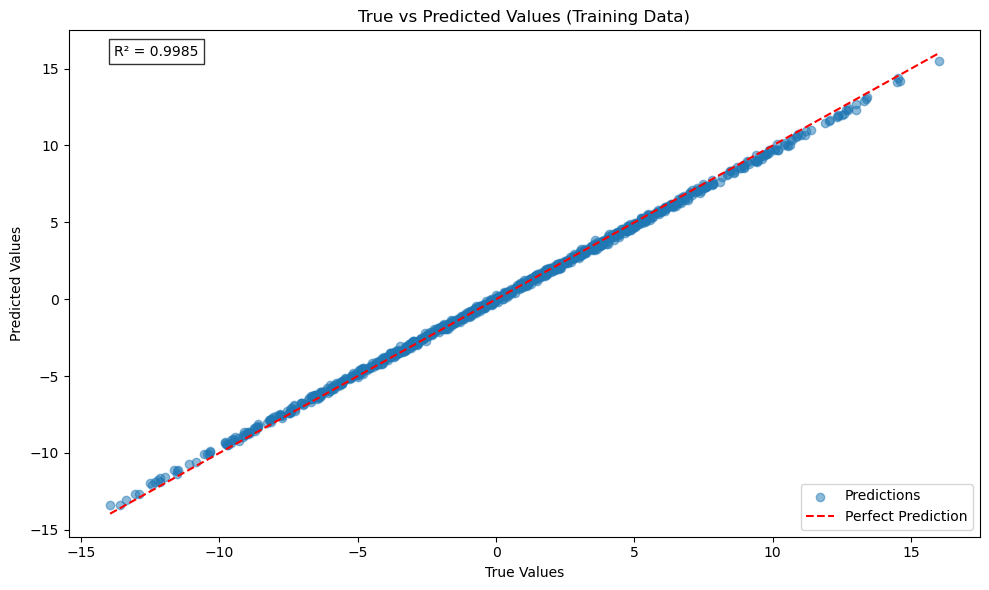

Training Metrics:
R² Score: 0.9985
RMSE: 0.2044


In [5]:
# Get predictions for training data
X_train = df[['x1', 'x2', 'x3']]
y_train = df['y']
y_pred = ml.predict(X_train)

# Create visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Training Data)')
plt.legend()

# Add R² score to plot
r2 = r2_score(y_train, y_pred)
plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print metrics
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"Training Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

In [5]:

# Get initial results
ml.model_summary()

# Get feature importance from raw model
print("\nFeature Importance (Raw Features):")
importance = ml.get_feature_importance()
if importance:
    for feature, imp in zip(importance['features'], importance['importances']):
        print(f"  {feature}: {imp:.4f}")

# Cross-validation on raw features
cv_results = ml.cross_validate(cv=5)
print(f"\nCross-validation R² (Raw): {cv_results['mean_score']:.4f} ± {cv_results['std_score']:.4f}")




MODEL TRAINING SUMMARY
Model Type: regression
Engine: LinearEngine
Trained: True

Performance Metrics:
  R2: 0.9996
  RMSE: 0.1033

Feature Importance (Raw Features):

Cross-validation R² (Raw): 0.9996 ± 0.0000

STEP 2: ADD FEATURE ENGINEERING


In [ ]:
print("\n" + "="*60)
print("STEP 2: ADD FEATURE ENGINEERING")
print("="*60)

# Now add feature engineering (can do this anytime!)
ml.add_feature_engine('basic_stats')
ml.apply_feature_engineering()

# Train new model with engineered features
ml.train_model(test_size=0.2)

# Compare performance
ml.model_summary()

# Cross-validation with engineered features
cv_results_eng = ml.cross_validate(cv=5)
print(f"\nCross-validation R² (Engineered): {cv_results_eng['mean_score']:.4f} ± {cv_results_eng['std_score']:.4f}")

print("\n" + "="*60)
print("STEP 3: ITERATIVE EXPLORATION")
print("="*60)

# Show current state
ml.summary()

# Try different model on same features
print("\n🔄 Trying Random Forest on engineered features...")
ml.quick_train('random_forest', test_size=0.2)
ml.model_summary()

# Reset and try different approach
print("\n🔄 Reset to raw features and try Random Forest...")
ml.reset_features()
ml.train_on_raw_features('random_forest', test_size=0.2)
ml.model_summary()

print("\n" + "="*60)
print("STEP 4: SELECTIVE FEATURE ENGINEERING")
print("="*60)

# Add feature engineering again
ml.add_feature_engine('basic_stats')
ml.apply_feature_engineering()

# Get feature importance to guide selection
ml.train_model(test_size=0.2)
importance = ml.get_feature_importance(top_n=5)

print("Top 5 most important features:")
if importance:
    top_features = importance['features'][:5]
    for feature, imp in zip(importance['features'][:5], importance['importances'][:5]):
        print(f"  {feature}: {imp:.4f}")
    
    # Train model with only top features
    print(f"\n🎯 Training with only top {len(top_features)} features...")
    ml.train_model(features_to_use=top_features, test_size=0.2)
    ml.model_summary()

print("\n" + "="*60)
print("STEP 5: FEATURE HISTORY TRACKING")
print("="*60)

# Show feature engineering history
ml.feature_summary()

print("\n" + "="*60)
print("FINAL COMPARISON")
print("="*60)

# Compare true vs estimated coefficients (if linear model)
true_coef = np.array([2, 3, 4])
print("True coefficients: [2, 3, 4]")

# Train linear model on raw features to see coefficients
ml.reset_features()
ml.set_model_engine('linear')
ml.train_model(features_to_use=['x1', 'x2', 'x3'], test_size=0.2)

if hasattr(ml.model_trainer.model, 'coef_'):
    estimated_coef = ml.model_trainer.model.coef_
    print(f"Estimated coefficients: {estimated_coef}")
    print("\nCoefficient comparison:")
    for i, (true, est) in enumerate(zip(true_coef, estimated_coef)):
        print(f"  x{i+1}: True={true:.2f}, Estimated={est:.2f}, Error={abs(true-est):.2f}")

# Final state summary
print("\n" + "="*60)
print("FINAL PIPELINE STATE")
print("="*60)
ml.summary()